# Getting Data

Para cargar los datos, podemos importar la función de cargador para los 20 datos de grupos de noticias de la siguiente manera:

In [105]:
from sklearn.datasets import fetch_20newsgroups

Luego podemos descargar el conjunto de datos con los parámetros predeterminados:

In [106]:
groups = fetch_20newsgroups()

# Thinking about features

Después de descargar los 20 grupos de noticias por cualquier medio que prefieramos, el objeto de datos llamado grupos ya está disponible en el programa. El objeto de datos está en forma de diccionario clave-valor. Sus claves son las siguientes:

In [107]:
groups.keys()

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])

La clave target_names proporciona los nombres de los grupos de noticias:

In [108]:
groups['target_names']

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

La clave de destino corresponde a un grupo de noticias pero está codificada como un entero:

In [109]:
groups.target

array([7, 4, 4, ..., 3, 1, 8])

Entonces, ¿cuáles son los valores distintos para estos enteros? Podemos usar la función única de NumPy para descubrirlo:

In [110]:
import numpy as np
np.unique(groups.target)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

Ellos varían de 0 a 19, representando 20 temas.

In [111]:
groups.data[0] 

"From: lerxst@wam.umd.edu (where's my thing)\nSubject: WHAT car is this!?\nNntp-Posting-Host: rac3.wam.umd.edu\nOrganization: University of Maryland, College Park\nLines: 15\n\n I was wondering if anyone out there could enlighten me on this car I saw\nthe other day. It was a 2-door sports car, looked to be from the late 60s/\nearly 70s. It was called a Bricklin. The doors were really small. In addition,\nthe front bumper was separate from the rest of the body. This is \nall I know. If anyone can tellme a model name, engine specs, years\nof production, where this car is made, history, or whatever info you\nhave on this funky looking car, please e-mail.\n\nThanks,\n- IL\n   ---- brought to you by your neighborhood Lerxst ----\n\n\n\n\n"

In [112]:
groups.target[0]

7

In [113]:
groups.target_names[groups.target[0]]

'rec.autos'

Entonces, el primer documento es del grupo de noticias rec.autos, al que se le asignó el número 7. Al leer esta publicación, podemos descubrir fácilmente que se trata de automóviles. La palabra auto aparece varias veces en el documento. Palabras como parachoques también parecen estar muy orientadas al automóvil. Sin embargo, las palabras como puertas pueden no estar necesariamente relacionadas con el automóvil, ya que también pueden tener que ver con mejoras en el hogar u otro tema. Como nota al margen, tiene sentido no distinguir entre puertas, puertas o la misma palabra con diferentes mayúsculas, como Puertas. Existen algunos casos raros en los que la capitalización sí importa, por ejemplo, estamos tratando de averiguar si un documento trata sobre la banda llamada La Puerta o el concepto más común, las puertas (en madera).

Podemos concluir con seguridad que si queremos averiguar si un documento fue del grupo de noticias rec.autos, la presencia o ausencia de palabras como automóvil, puertas y parachoques pueden ser características muy útiles. Presencia o no es una variable booleana, y también podemos proponer mirar el recuento de ciertas palabras. Por ejemplo, el automóvil ocurre varias veces en el documento. Tal vez, cuantas más veces se encuentre esa palabra en un texto, más probable es que el documento tenga algo que ver con los automóviles. Esto nos lleva a otra cuestión de cuántas palabras hay en un documento. Podemos imaginar que los documentos varían en longitud y en la cantidad de veces que ocurre una palabra en particular. Obviamente, los textos más largos generalmente contienen más palabras y, por lo tanto, tenemos que compensar eso. Por ejemplo, las dos primeras publicaciones difieren en longitud:

In [114]:
len(groups.data[0])

721

In [115]:
len(groups.data[1])

858

¿Qué tal secuencias de palabras? Por ejemplo, parachoques delantero, coche deportivo y especificaciones del motor. Estos parecen ser fuertes indicadores de un documento con tema de automóvil. Sin embargo, la palabra auto ocurrió con mucha más frecuencia que el auto deportivo.
Además, la cantidad de bigramas en el documento es bastante grande en comparación con la cantidad de unigramas distintos. Tenemos los bigrams de este auto y el auto que busca, por ejemplo, que básicamente tienen el mismo valor de información en el contexto de la clasificación de grupos de noticias.

Aparentemente, algunas palabras simplemente no tienen mucho valor informativo. Las palabras que encontramos con mucha frecuencia en cualquier documento de todas las categorías, como a, the, y se llaman palabras de detención, y debemos ignorarlas. Parece que solo estamos interesados en la aparición de ciertas palabras, su conteo o una medida relacionada, y no en el orden de las palabras. Por lo tanto, podemos ver un texto como una bolsa de palabras. Esto se llama modelo de bolsa de palabras. Este es un modelo muy básico, pero funciona bastante bien en la práctica. Opcionalmente, podemos definir un modelo más complejo que tenga en cuenta el orden de las palabras y partes de las etiquetas de voz. Sin embargo, dicho modelo será más costoso computacionalmente y difícil de programar. Además, el modelo básico de bolsa de palabras en la mayoría de los casos es suficiente. ¿Tienes alguna duda? Podemos intentar visualizar cómo se distribuyen los unigramas y ver si el modelo de bolsa de palabras tiene sentido o no.

# Visualization

Es bueno visualizar para tener una idea general de cómo se estructuran los datos, qué posibles problemas pueden surgir y si hay alguna irregularidad de la que tengamos que ocuparnos.

En el contexto de múltiples temas o categorías, es importante saber cuál es la distribución de los temas. Una distribución de clase uniforme es la más fácil de manejar porque no hay categorías subrepresentadas o sobrerrepresentadas.
Sin embargo, con frecuencia tenemos una distribución sesgada con una o más categorías dominantes. En este documento, utilizamos el paquete seaborn (https://seaborn.pydata.org/) para calcular el histograma de categorías y trazarlo utilizando el paquete matplotlib (https://matplotlib.org/). Podemos instalar ambos paquetes a través de pip. Ahora veamos la distribución de las clases de la siguiente manera:

In [116]:
import seaborn as sns #pip install seaborn

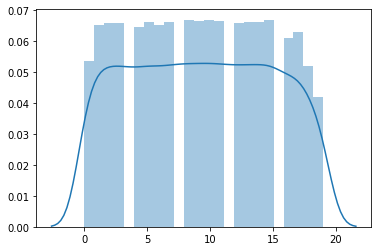

In [117]:
sns.distplot(groups.target)


In [118]:
import matplotlib.pyplot as plt
plt.show()

Como puede ver, la distribución es (aproximadamente) uniforme, por lo que es una cosa menos de qué preocuparse.

Los datos de texto que tratamos en el conjunto de datos de 20 grupos de noticias son de alta dimensión. Cada característica requiere una dimensión extra. Si usamos el recuento de palabras como características, tenemos tantas dimensiones como características interesantes. Para los recuentos de unigrama, utilizaremos la clase CountVectorizer, que se describe en la siguiente tabla:

El siguiente código muestra un histograma de los 500 recuentos de palabras más altos:

In [119]:
from sklearn.feature_extraction.text import CountVectorizer
#import numpy as np
#import matplotlib.pyplot as plt
#import seaborn as sns
#from sklearn.datasets import fetch_20newsgroups

In [120]:
cv = CountVectorizer(stop_words="english", max_features=500)
groups = fetch_20newsgroups()
transformed = cv.fit_transform(groups.data)
print(cv.get_feature_names())

['00', '000', '0d', '0t', '10', '100', '11', '12', '13', '14', '145', '15', '16', '17', '18', '19', '1993', '1d9', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '34u', '35', '40', '45', '50', '55', '80', '92', '93', '__', '___', 'a86', 'able', 'ac', 'access', 'actually', 'address', 'ago', 'agree', 'al', 'american', 'andrew', 'answer', 'anybody', 'apple', 'application', 'apr', 'april', 'area', 'argument', 'armenian', 'armenians', 'article', 'ask', 'asked', 'att', 'au', 'available', 'away', 'ax', 'b8f', 'bad', 'based', 'believe', 'berkeley', 'best', 'better', 'bible', 'big', 'bike', 'bit', 'black', 'board', 'body', 'book', 'box', 'buy', 'ca', 'california', 'called', 'came', 'canada', 'car', 'card', 'care', 'case', 'cause', 'cc', 'center', 'certain', 'certainly', 'change', 'check', 'children', 'chip', 'christ', 'christian', 'christians', 'church', 'city', 'claim', 'clinton', 'clipper', 'cmu', 'code', 'college', 'color', 'colorado', 'columbia', '

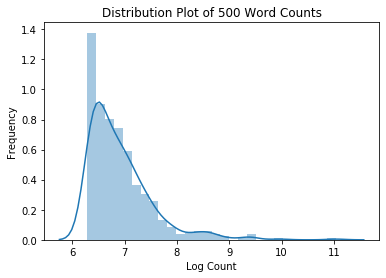

In [121]:
sns.distplot(np.log(transformed.toarray().sum(axis=0)))
plt.xlabel('Log Count')
plt.ylabel('Frequency')
plt.title('Distribution Plot of 500 Word Counts')
plt.show()

Este es nuestro primer rastro de obtener la lista de las 500 palabras principales con el objetivo de las características más indicativas. No se ve perfecto. ¿Podemos mejorarlo? Sí, mediante las técnicas de preprocesamiento de datos en la siguiente sección.

# Data preprocessing

Vemos elementos, que obviamente no son palabras, como 00 y 000. Tal vez deberíamos ignorar los elementos que contienen solo dígitos. Sin embargo, 0d y 0t tampoco son palabras. También vemos elementos como __, por lo que tal vez solo deberíamos permitir elementos que constan solo de letras. Las publicaciones contienen nombres como Andrew también. Podemos filtrar nombres con el corpus de nombres de NLTK con el que acabamos de trabajar. Por supuesto, con cada filtrado que apliquemos, debemos asegurarnos de no perder
información. Finalmente, vemos palabras que son muy similares, como intentar y tratar, y palabra y palabras.

Tenemos dos estrategias básicas para tratar palabras de la misma raíz: derivación y lematización. Stemming es el enfoque de tipo más rápido y sucio. Se trata de cortar, si es necesario, las letras, por ejemplo, 'palabras' se convierte en 'palabra' después de la derivación. El resultado de la derivación no tiene que ser una palabra válida. La lematización, por otro lado, es más lenta pero más precisa.
Lemmatizing realiza una búsqueda en el diccionario y garantiza la devolución de una palabra válida a menos que comencemos con una palabra no válida. 

Reutilicemos el código de la sección anterior para obtener las 500 palabras con los recuentos más altos, pero esta vez, aplicaremos el filtrado: Debemos de descargar los nombres de NLTK con los comandos import nltk y nltk.download('names')

In [122]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.datasets import fetch_20newsgroups
from nltk.corpus import names
from nltk.stem import WordNetLemmatizer

In [123]:
def letters_only(astr):
    return astr.isalpha()

cv = CountVectorizer(stop_words="english", max_features=500)
groups = fetch_20newsgroups()
cleaned = []
all_names = set(names.words())
lemmatizer = WordNetLemmatizer()


In [124]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /home/echartea/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [125]:
for post in groups.data:
    for word in post.split():
        if letters_only(word) and word not in all_names:
            cleaned.append(' '.join([lemmatizer.lemmatize(word.lower())]))

In [126]:
transformed = cv.fit_transform(cleaned)


In [127]:
print(cv.get_feature_names())

['able', 'accept', 'access', 'according', 'act', 'action', 'actually', 'add', 'address', 'ago', 'agree', 'algorithm', 'allow', 'american', 'anonymous', 'answer', 'anybody', 'apple', 'application', 'apr', 'arab', 'area', 'argument', 'armenian', 'article', 'ask', 'asked', 'assume', 'atheist', 'attack', 'attempt', 'available', 'away', 'bad', 'based', 'basic', 'belief', 'believe', 'best', 'better', 'bible', 'big', 'bike', 'bit', 'black', 'board', 'body', 'book', 'box', 'build', 'bus', 'business', 'buy', 'ca', 'california', 'called', 'came', 'car', 'card', 'care', 'carry', 'case', 'cause', 'center', 'certain', 'certainly', 'chance', 'change', 'check', 'child', 'chip', 'christian', 'church', 'city', 'claim', 'clear', 'clipper', 'code', 'college', 'color', 'come', 'coming', 'command', 'comment', 'common', 'communication', 'company', 'computer', 'computing', 'consider', 'considered', 'contact', 'control', 'controller', 'copy', 'correct', 'cost', 'country', 'couple', 'course', 'cover', 'create'

Esta lista parece ser mucho más limpia. También podemos decidir usar solo sustantivos u otra parte del discurso como alternativa.

# Clustering

El agrupamiento divide un conjunto de datos en grupos. Esta es una tarea de aprendizaje no supervisada, ya que generalmente no tenemos etiquetas. En los casos más realistas, la complejidad es tan alta que no podemos encontrar la mejor división en grupos;
sin embargo, generalmente podemos encontrar una aproximación decente. La tarea de análisis de agrupamiento requiere una función de distancia, que indica qué tan cerca están los elementos entre sí. Una distancia común es la distancia euclidiana, que es la distancia que vuela un pájaro. Otra distancia común es la distancia en taxi, que mide la distancia en cuadras de la ciudad. La agrupación se usó por primera vez en la década de 1930 por investigadores de ciencias sociales sin computadoras modernas.

La agrupación puede ser dura o blanda. En la agrupación rígida, un elemento pertenece solo a un grupo, mientras que en la agrupación flexible, un elemento puede pertenecer a múltiples agrupaciones con diferentes probabilidades. En ocacion he usado solo el método de agrupamiento duro.

También podemos tener elementos que no pertenecen a ningún clúster. Estos elementos se consideran valores atípicos de anomalías o simplemente ruido. Un clúster también puede ser parte de otro clúster, que también puede ser un elemento en otro clúster de nivel superior. Si tenemos una jerarquía de clústeres, hablamos de una agrupación jerárquica. Hay más de 100 algoritmos de agrupamiento, el más utilizado es el algoritmo k-means. La agrupación k-means asigna puntos de datos a k agrupaciones. El problema de la agrupación no se puede resolver directamente, pero podemos aplicar heurísticas, que logran un resultado aceptable. El algoritmo k-means intenta encontrar los mejores grupos para un conjunto de datos, dada una cantidad de grupos.

Se supone que debemos conocer este número o encontrarlo a través de prueba y error. En esta receta, evalúo los grupos a través del método Dentro de la suma de errores al cuadrado (WSSSE), también conocido como Dentro de la suma de cuadrados al cuadrado (WCSS). Esta métrica calcula la suma de
El error al cuadrado de la distancia entre cada punto y el centroide de su grupo asignado. El algoritmo para k-means itera entre dos pasos, sin incluir la inicialización (generalmente aleatoria) de k-centroides:

1. Asigne a cada punto de datos un grupo con la distancia más baja.
2. Vuelva a calcular el centro del grupo como la media de las coordenadas de los puntos del grupo.

El algoritmo se detiene cuando las asignaciones de clúster se vuelven estables.


La complejidad promedio viene dada por O (k n T), donde k es el número de grupos, n es el número de muestras y T es el número de iteraciones. El siguiente código aplica la agrupación y muestra un diagrama de dispersión de las etiquetas reales y las etiquetas de agrupación:

In [128]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.datasets import fetch_20newsgroups
from nltk.corpus import names
from nltk.stem import WordNetLemmatizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [129]:
def letters_only(astr):
    return astr.isalpha()

In [130]:
cv = CountVectorizer(stop_words="english", max_features=500)
groups = fetch_20newsgroups()
cleaned = []
all_names = set(names.words())
lemmatizer = WordNetLemmatizer()

In [131]:
for post in groups.data:
    cleaned.append(' '.join([
    lemmatizer.lemmatize(word.lower())
    for word in post.split()
    if letters_only(word)
    and word not in all_names]))

In [132]:
transformed = cv.fit_transform(cleaned)
km = KMeans(n_clusters=20)
km.fit(transformed)
labels = groups.target


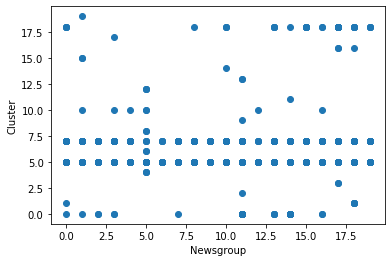

In [134]:

#print(len(labels))
#print(len(km.labels_))
plt.scatter(labels, km.labels_)
plt.xlabel('Newsgroup')
plt.ylabel('Cluster')
plt.show()

# Topic modeling

Los temas del procesamiento del lenguaje natural no coinciden exactamente con la definición del diccionario y corresponden a un concepto estadístico más nebuloso. Hablamos de modelos de tema y distribuciones de probabilidad de palabras vinculadas a temas, tal como los conocemos. Cuando leemos un texto, esperamos que ciertas palabras que aparecen en el título o el cuerpo del texto capturen el contexto semántico del documento. Un artículo sobre programación en Python tendrá palabras como clase y función, mientras que una historia sobre serpientes tendrá palabras como huevos y miedo. Los documentos generalmente tienen múltiples temas, por ejemplo, esta receta trata sobre modelos de temas y factorización de matriz no negativa, que discutiremos en breve. Por lo tanto, podemos definir un modelo aditivo para los temas asignando diferentes pesos a los temas.

Uno de los algoritmos de modelado del tema es la factorización matricial no negativa (NMF). Este algoritmo factoriza una matriz en un producto de dos matrices más pequeñas de tal manera que las tres matrices no tienen valores negativos. Por lo general, solo podemos aproximar numéricamente la solución de la factorización, y la complejidad temporal es polinómica. La clase NMF scikit-learn implementa este algoritmo, como se muestra en la siguiente tabla:

NMF también se puede aplicar a la agrupación de documentos y al procesamiento de señales, como se muestra en el siguiente código:

In [135]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.datasets import fetch_20newsgroups
from nltk.corpus import names
from nltk.stem import WordNetLemmatizer
from sklearn.decomposition import NMF
def letters_only(astr):
    return astr.isalpha()

cv = CountVectorizer(stop_words="english", max_features=500)
groups = fetch_20newsgroups()
cv = CountVectorizer(stop_words="english", max_features=500)
groups = fetch_20newsgroups()
cleaned = []
all_names = set(names.words())
lemmatizer = WordNetLemmatizer()


for post in groups.data:
    cleaned.append(' '.join([
    lemmatizer.lemmatize(word.lower())
    for word in post.split()
    if letters_only(word)
    and word not in all_names]))
    


In [137]:
    
transformed = cv.fit_transform(cleaned)
nmf = NMF(n_components=100, random_state=43).fit(transformed)
for topic_idx, topic in enumerate(nmf.components_):
    label = '{}: '.format(topic_idx)
    print(label, " ".join([cv.get_feature_names()[i]
        for i in topic.argsort()[:-9:-1]]))

0:  wa thought later took left order seen taken
1:  db bit data place stuff add time line
2:  server using display screen support code mouse application
3:  file section information write source change entry number
4:  disk drive hard controller support card board head
5:  entry rule program source number info email build
6:  new york sale change service result study early
7:  image software user package using display include support
8:  window manager application using offer user information course
9:  gun united control house american second national issue
10:  hockey league team game division player list san
11:  turkish government sent war study came american world
12:  program change technology display information version application rate
13:  space nasa technology service national international small communication
14:  government political federal sure free private local country
15:  output line open write read return build section
16:  people country doing tell live killed lot s

En este capítulo, adquirimos los conceptos fundamentales de PNL como un subcampo importante en el aprendizaje automático, incluida la tokenización, la derivación y la lematización, el etiquetado POS. También exploramos tres poderosos paquetes de PNL y realizamos algunas tareas comunes usando NLTK. Luego continuamos con el modelado de temas de los grupos de noticias del proyecto principal. Comenzamos con la extracción de características con técnicas de tokenización, así como la derivación y la lematización. Luego pasamos por la agrupación e implementaciones de la agrupación k-means y la factorización de matriz no negativa para el modelado de temas. Adquirimos experiencia práctica al trabajar con datos de texto y abordar problemas de modelado de temas de una manera de aprendizaje sin supervisión. Mencionamos brevemente los recursos corporales disponibles en NLTK. Sería una gran idea aplicar lo que hemos aprendido en algunos de los corpus. ¿Qué temas puedes extraer del corpus de Shakespeare?